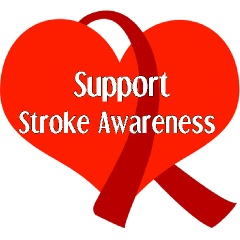

**A Machine Learning Approach to Stroke Risk Prediction**
---

The goal of this approach is to encourage patients to make the necessary changes in their health to help them live longer and also reduce their chances of contracting this disease in the future.
A public dataset available on Kaggle is used in this project, which contains patients' medical records. I will be developing a screening tool that would aid in identifying stroke risk in patients in 10 years.

By: Precious Ebite Azun 

Published on https://link.medium.com/wRAyqZHEjrb

**Importing essential libraries needed for this project**
---

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 12)

**Let's view the data**

In [184]:
strokedata = pd.read_csv('healthcare_stroke.csv')
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Providing general information about the data and revealing statistics**

In [185]:
print(strokedata.shape)
print(strokedata.describe())

(5110, 12)
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.1

In [186]:
strokedata.stroke.unique()

array([1, 0], dtype=int64)

****DATA CLEANING AND PREPROCESSING****
---

**Checking for Null values; Falling short of data or having duplicates can lead to bias or variance from our expected output**

In [187]:
strokedata.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Filling up the missing values using the mean value for the BMI**

In [188]:
strokedata.bmi.replace(to_replace=np.NaN, value=strokedata.bmi.mean(), inplace=True)
strokedata.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**NO duplicates found; so we are good to go**

In [189]:
strokedata.duplicated().sum()

0

In [190]:
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [191]:
strokedata.iloc[:1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


**Getting a sense of the unique states of the data**

In [192]:
strokedata.gender.unique(), strokedata.ever_married.unique(), strokedata.Residence_type.unique(),strokedata.work_type.unique(),strokedata.smoking_status.unique()

(array(['Male', 'Female', 'Other'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Urban', 'Rural'], dtype=object),
 array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object))

**Gender seems to be having 'Other', let's give it to the 'Male' section**

In [193]:
strokedata.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [194]:
strokedata['gender'] = strokedata['gender'].replace('Other', 'Male')
strokedata.gender.value_counts()
strokedata.drop('id', axis=1,inplace=True)

**done! the rest are unique just like YOU!! Smiles**

In [195]:
strokedata.gender.value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

**Checking for outliers**

In [196]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

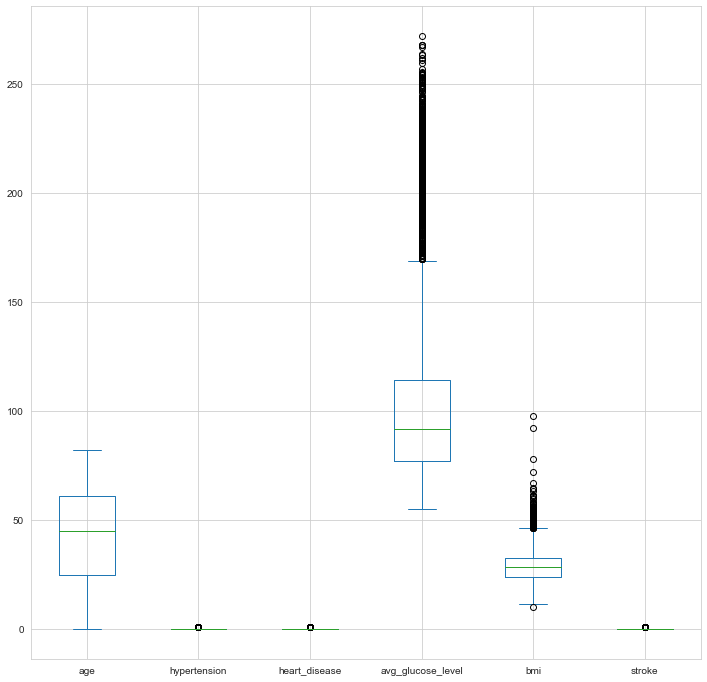

In [197]:
strokedata.plot(kind='box')
plt.show()

In [198]:
strokedata['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [199]:
(strokedata['avg_glucose_level']>114).value_counts()

False    3828
True     1282
Name: avg_glucose_level, dtype: int64

Having more than 200mg/dL for glucose level is very possible so i decided to keep the data and also with BMI

In [200]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [201]:
strokedata['gender']=enc.fit_transform(strokedata['gender'])
strokedata['ever_married']=enc.fit_transform(strokedata['ever_married'])
strokedata['work_type']=enc.fit_transform(strokedata['work_type'])
strokedata['Residence_type']=enc.fit_transform(strokedata['Residence_type'])
strokedata['smoking_status']=enc.fit_transform(strokedata['smoking_status'])

****EXPLORATORY DATA ANALYSIS****
---

**To make sure the data is ready for the Model training stage, we need to gather general information again**

In [202]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


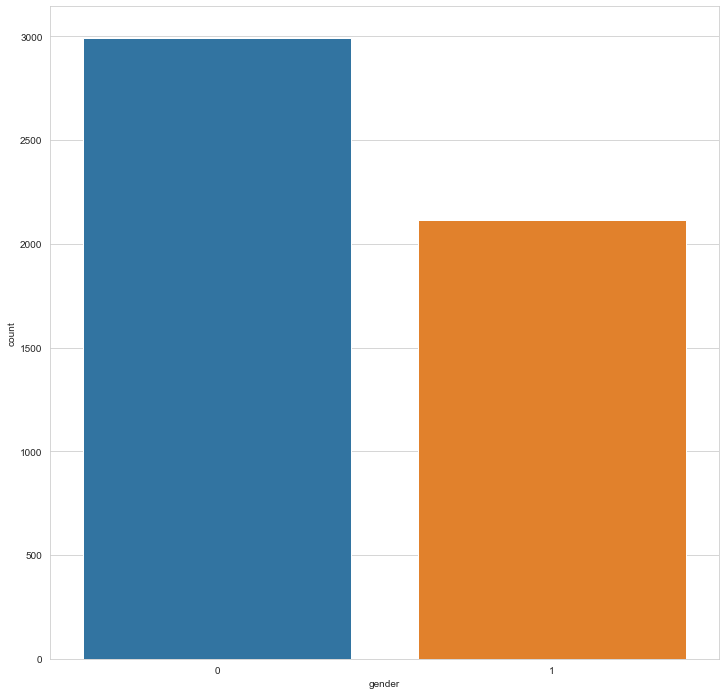

In [203]:
sns.countplot(x='gender', data=strokedata)
plt.show()

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

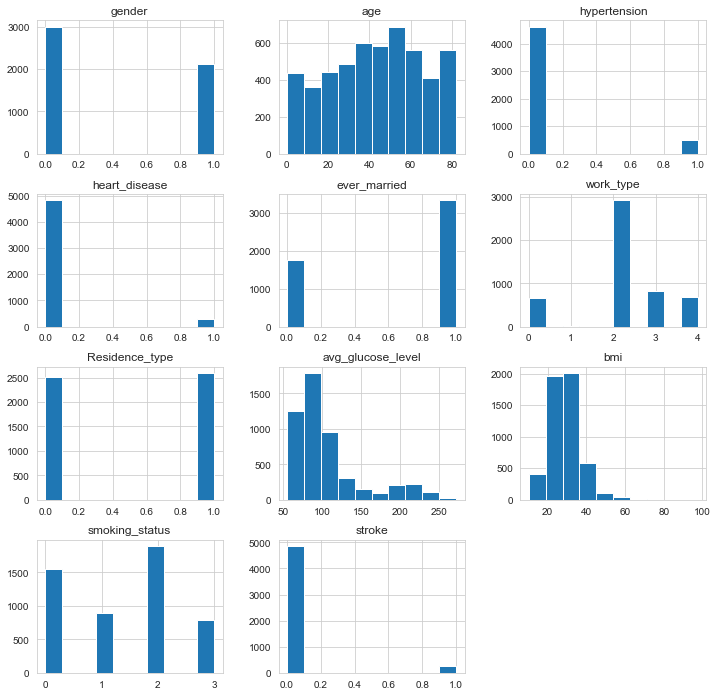

In [204]:
strokedata.hist()

In [205]:
columns = ['bmi','avg_glucose_level','age']

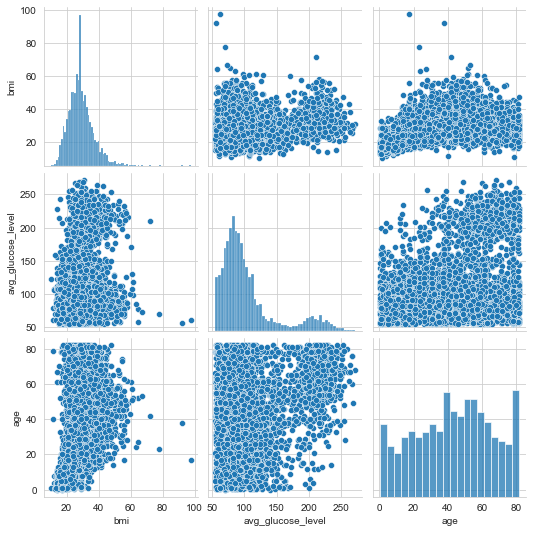

In [206]:
sns.pairplot(strokedata[columns])

Learn to partition before normalizing to avoid data leakage

****PARTIONING****
---

**For a predictive model, we have to split the data into two sets; Training set and testing set (80% & 20% respectively)**

In [207]:
X=strokedata.drop('stroke', axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [208]:
Y= strokedata.stroke
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [210]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [211]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [212]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

****NORMALIZATION****
---

**We have to maintain this distribution of data we have and ensure there is no variation so that we can achieve our desired result**

In [213]:
strokedata.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414090,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.492612,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [214]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

In [215]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
X_train_std

array([[-0.83864971,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83864971,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19239295, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83864971,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19239295,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83864971,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [216]:
X_test_std

array([[-0.83864971, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83864971,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83864971,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83864971,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83864971,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19239295,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

**ALGORITHMS IMPLEMENTATION**
---

1. Logistic Regression
---

In [217]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [218]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [219]:
Y_pred=lr.predict(X_test_std)
from sklearn.metrics import accuracy_score

In [220]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [221]:
ac_lr

0.9471624266144814

In [222]:
lr_train_accuracy=lr.score(X_train_std,Y_train)
lr_train_accuracy

0.9522994129158513

In [223]:
lr_test_accuracy=lr.score(X_test_std,Y_test)
lr_test_accuracy

0.9471624266144814

2. K-Nearest Neighbor
---

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [225]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [226]:
Y_pred=knn.predict(X_test_std)
ac_knn=accuracy_score(Y_test,Y_pred)

In [227]:
ac_knn

0.9452054794520548

In [228]:
knn_train_accuracy=knn.score(X_train_std,Y_train)
knn_train_accuracy

0.9535225048923679

In [229]:
knn_test_accuracy=knn.score(X_test_std,Y_test)
knn_test_accuracy

0.9452054794520548

3. Decision Tree
---

In [230]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [231]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [232]:
dt.feature_importances_

array([0.04143978, 0.17667948, 0.0167728 , 0.02658366, 0.00852736,
       0.0473029 , 0.04845569, 0.33140242, 0.23382166, 0.06901424])

In [233]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

Looking at the important features that could lead to stroke with high values:

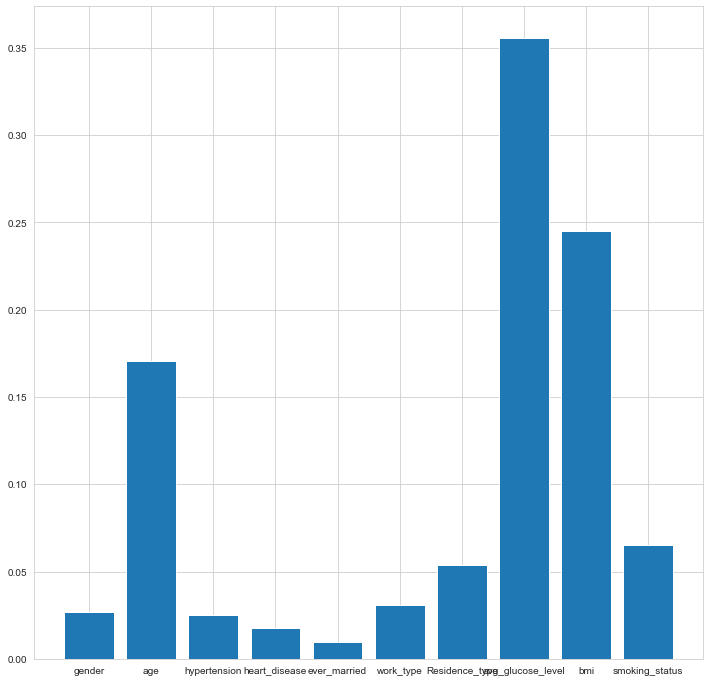

In [234]:
plt.bar(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'], [0.02664364, 0.17055075, 0.02532831, 0.01742903, 0.00942488,
       0.03069892, 0.05366126, 0.35594109, 0.24532105, 0.06500107])
plt.show()

In [235]:
Y_pred=dt.predict(X_test_std)

In [236]:
from sklearn.metrics import accuracy_score

In [237]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [238]:
ac_dt

0.901174168297456

In [239]:
dt_train_accuracy=dt.score(X_train_std,Y_train)
dt_train_accuracy

1.0

In [240]:
dt_test_accuracy=dt.score(X_test_std,Y_test)
dt_test_accuracy

0.901174168297456

In [241]:
data= {'Classifier':['Logistic Regression','KNN','Decision Tree'],
       'Training_accuracy %':[lr_train_accuracy*100,knn_train_accuracy*100,dt_train_accuracy*100],
       'Testing_accuracy %':[lr_test_accuracy*100,knn_test_accuracy*100,dt_test_accuracy*100],
       'Overall_model_accuracy %':[ac_lr*100,ac_knn*100, ac_dt*100]}
df=pd.DataFrame(data)
df

,Classifier,Training_accuracy %,Testing_accuracy %,Overall_model_accuracy %
0,Logistic Regression,95.229941,94.716243,94.716243
1,KNN,95.352250,94.520548,94.520548
2,Decision Tree,100.000000,90.117417,90.117417


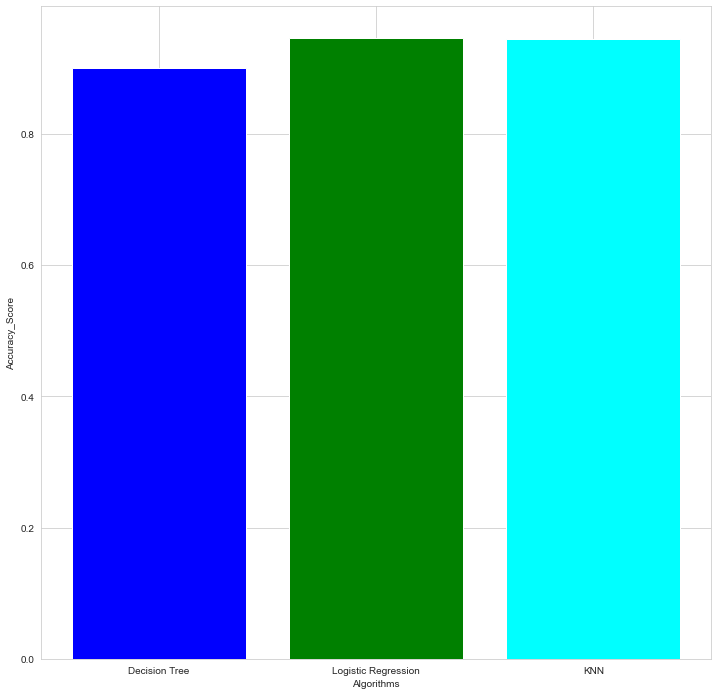

In [242]:
plt.bar(['Decision Tree','Logistic Regression','KNN'],[ac_dt,ac_lr,ac_knn], color=['Blue','Green','Cyan'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy_Score')
plt.show()

Logistic regression algorithm gives the highest accuracy score for this prediction with 0.947 == 94.7%
---

Thank you for your time and together we can make the world a healthier place to live in.

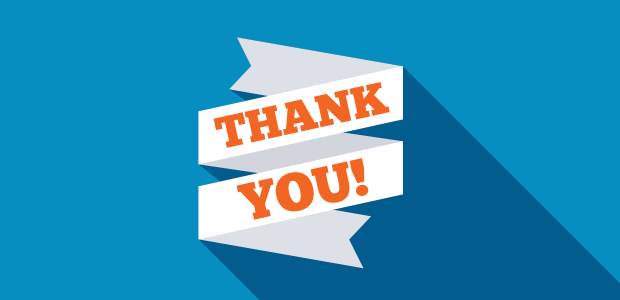